In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 3].values

In [4]:
#converting gender to number

labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [5]:
# Spliting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Different Classification Algorithm

## 1. Decision Tree

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

#### Performance Metrics

In [8]:
f1_score_dt = metrics.f1_score(y_test,y_pred_dt,average='macro')
print('F1 score: {0:f}'.format (f1_score_dt))
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
sdt = precision_score(y_test, y_pred_dt, average='macro')
print('precision score: {0:f}'.format (sdt))
s_dt = recall_score(y_test,y_pred_dt, average='macro')
print('recall score: {0:f}'.format (s_dt))
score_dt = metrics.accuracy_score(y_test,dt.predict(X_test))
print('Accuracy:{0:f}'.format(score_dt))

F1 score: 0.909543
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100

[[63  5]
 [ 3 29]]
precision score: 0.903743
recall score: 0.916360
Accuracy:0.920000


## 2. Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, min_samples_leaf=30)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [10]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

#### Performance Metrics

In [11]:
f1_score_rf = metrics.f1_score(y_test,y_pred_rf,average='macro')
print('F1 score: {0:f}'.format (f1_score_rf))
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
srf = precision_score(y_test, y_pred_rf, average='macro')
print('precision score: {0:f}'.format (srf))
s_rf = recall_score(y_test,y_pred_rf, average='macro')
print('recall score: {0:f}'.format (s_rf))
score_rf = metrics.accuracy_score(y_test,rf.predict(X_test))
print('Accuracy:{0:f}'.format(score_rf))

F1 score: 0.932157
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

[[64  4]
 [ 2 30]]
precision score: 0.926025
recall score: 0.939338
Accuracy:0.940000


## 3. Logistic Regression

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
lr = LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [14]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

#### Performance Matrics

In [15]:
f1_score_lr = metrics.f1_score(y_test,y_pred_lr,average='macro')
print('F1 score: {0:f}'.format (f1_score_lr))
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
slr = precision_score(y_test, y_pred_lr, average='macro')
print('precision score: {0:f}'.format (slr))
s_lr = recall_score(y_test,y_pred_lr, average='macro')
print('recall score: {0:f}'.format (s_lr))
score_lr = metrics.accuracy_score(y_test,lr.predict(X_test))
print('Accuracy:{0:f}'.format(score_lr))

F1 score: 0.893855
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

[[65  3]
 [ 6 26]]
precision score: 0.906022
recall score: 0.884191
Accuracy:0.910000



# Performance Matrics Evaluation

#### Comparing Accuracies

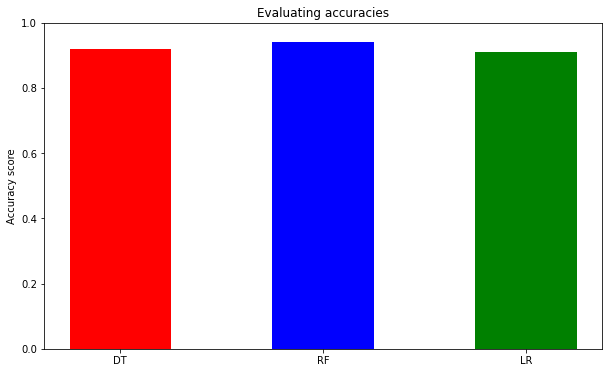

In [16]:
algo = ['DT','RF','LR']
score = [score_dt, score_rf,score_lr]
c = ['Red','Blue','Green']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c),
plt.title('Evaluating accuracies')
plt.ylabel('Accuracy score')
plt.ylim(0,1)
plt.show()

#### Comparing F1 Scores

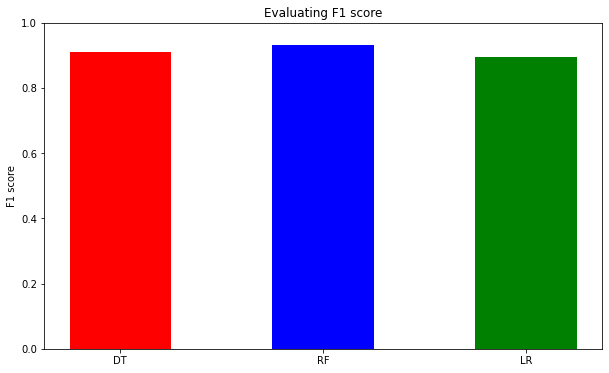

In [17]:
algo = ['DT','RF','LR']
score = [f1_score_dt, f1_score_rf,f1_score_lr]
c = ['Red','Blue','Green']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating F1 score')
plt.ylabel('F1 score')
plt.ylim(0,1)
plt.show()

#### Coparing precision score

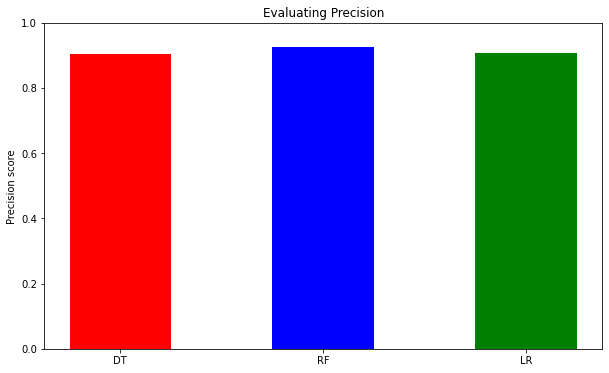

In [18]:
algo = ['DT','RF','LR']
score = [sdt,srf,slr]
c = ['Red','Blue','Green']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Precision')
plt.ylabel('Precision score')
plt.ylim(0,1)
plt.show()

#### Comparing recall score

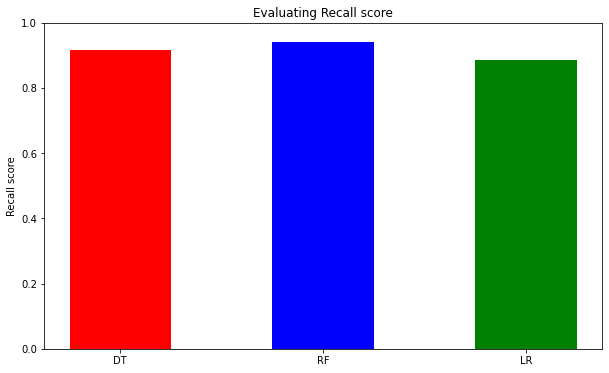

In [19]:
algo = ['DT','RF','LR']
score = [s_dt,s_rf,s_lr]
c = ['Red','Blue','Green']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Recall score')
plt.ylabel('Recall score')
plt.ylim(0,1)
plt.show()

# Plotting the performance

For comparing the performance, we make use of the Receiver Characteristics Curve – Area Under Curve that is plotted between True positive and False positive rates, where true positive is totally positive and false positive is a total negative. The area under the curve (AUC) is the summary of this curve that tells about how good a model is when we talk about its ability to generalize.

Let's plot the ROC-AUC graph to check the best performing model.

In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
fp1, tp1, thresholds1 = roc_curve(y_test, y_pred_dt[:])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, y_pred_rf[:])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, y_pred_lr[:])
roc_auc_model3 = auc(fp3, tp3)

print("AUC for Decision Tree Model:",roc_auc_model1)
print("AUC for Random Forest Model :", roc_auc_model2)
print("AUC for K-Nearest Neighbours Model :",roc_auc_model3)

AUC for Decision Tree Model: 0.9163602941176471
AUC for Random Forest Model : 0.9393382352941176
AUC for K-Nearest Neighbours Model : 0.8841911764705883


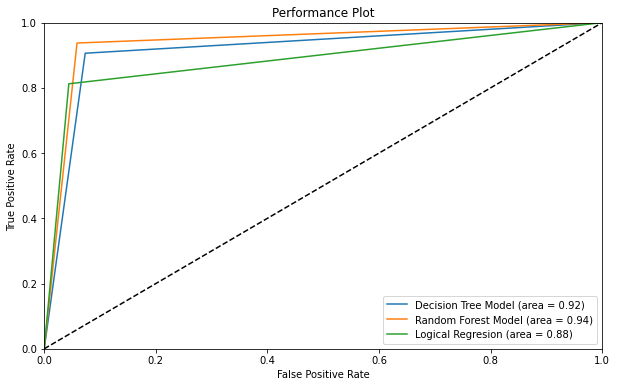

In [22]:
plt.figure(figsize=(10,6))
plt.clf()
plt.plot(fp1, tp1, label='Decision Tree Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='Random Forest Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='Logical Regresion (area = %0.2f)' %roc_auc_model3)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Performance Plot')
plt.legend(loc="lower right")
plt.show()

### From the above graph the Random Forest model captures the highest AUC and can be considered as the best performing model. This way we can compute and compare different predictive models.

# K fold cross validation and infer the BEST Algorithm

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Converting object type to float
# creating a dict file
gender = {'Male': 1,'Female': 2}

In [25]:
# traversing through dataframe
# Gender column and writing
# values where key matches
data.Gender = [gender[item] for item in data.Gender]

In [26]:
# Isolate the features matrix from the DataFrame.
X = data.iloc[:, 0:3]
# Isolate the target vector from the DataFrame.
y = data.iloc[:, -1]

In [27]:
# We check the shape of the features matrix, and target vector.
print('The Features Matrix Has %d Rows And %d Column(s)'%(X.shape))
print('The Target Matrix Has %d Rows And %d Column(s)'%(np.array(y).reshape(-1, 1).shape))

The Features Matrix Has 400 Rows And 3 Column(s)
The Target Matrix Has 400 Rows And 1 Column(s)


## Implimenting Cross Validation 

### Logistic Regression

In [28]:
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []
model = LogisticRegression(solver= 'liblinear')
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.825, 0.875, 0.7625, 0.4125, 0.3625]
Avg accuracy : 0.6475


### Decision Tree

In [31]:
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []
dtree = DecisionTreeClassifier()
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    dtree.fit(X_train,y_train)
    pred_values = dtree.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.875, 0.9375, 0.8125, 0.8, 0.7625]
Avg accuracy : 0.8375


### Random Forest

In [30]:
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []
rfc = RandomForestClassifier(n_estimators=200)
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    rfc.fit(X_train,y_train)
    pred_values = rfc.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.925, 0.9625, 0.825, 0.8, 0.9125]
Avg accuracy : 0.885
